In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ilinc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
categoryIndex = {
    'agriculture' :1,
    'cultural' : 2,
    'parenting' : 3,
    'sport' : 4,
    'travel' : 5
}

ro_df = pd.DataFrame(columns=['category','siteIdx', 'text'])

ro_df_agriculture = pd.read_csv('RO/agricultureRo.csv')
ro_df_agriculture['category'] = categoryIndex['agriculture']
ro_df = pd.concat([ro_df[['category', 'siteIdx', 'text']], ro_df_agriculture[['category', 'siteIdx', 'text']]], ignore_index=True)

ro_df_cultural = pd.read_csv('RO/culturalRo.csv')
ro_df_cultural['category'] = categoryIndex['cultural']
ro_df = pd.concat([ro_df[['category', 'siteIdx', 'text']], ro_df_cultural[['category', 'siteIdx', 'text']]], ignore_index=True)

ro_df_parenting = pd.read_csv('RO/parentingRo.csv')
ro_df_parenting['category'] = categoryIndex['parenting']
ro_df = pd.concat([ro_df[['category', 'siteIdx', 'text']], ro_df_parenting[['category', 'siteIdx', 'text']]], ignore_index=True)

ro_df_sport = pd.read_csv('RO/sportRo.csv')
ro_df_sport['category'] = categoryIndex['sport']
ro_df = pd.concat([ro_df[['category', 'siteIdx', 'text']], ro_df_sport[['category', 'siteIdx', 'text']]], ignore_index=True)

ro_df_travel = pd.read_csv('RO/travelRo.csv')
ro_df_travel['category'] = categoryIndex['travel']
ro_df = pd.concat([ro_df[['category', 'siteIdx', 'text']], ro_df_travel[['category', 'siteIdx', 'text']]], ignore_index=True)

ro_df.to_csv('RomanianTexts.csv', index=False)

md_df = pd.DataFrame(columns=['category','siteIdx', 'text'])

md_df_agriculture = pd.read_csv('MD/agricultureMd.csv')
md_df_agriculture['category'] = categoryIndex['agriculture']
md_df = pd.concat([md_df[['category', 'siteIdx', 'text']], md_df_agriculture[['category', 'siteIdx', 'text']]], ignore_index=True)

md_df_cultural = pd.read_csv('MD/culturalMd.csv')
md_df_cultural['category'] = categoryIndex['cultural']
md_df = pd.concat([md_df[['category', 'siteIdx', 'text']], md_df_cultural[['category', 'siteIdx', 'text']]], ignore_index=True)

md_df_parenting = pd.read_csv('MD/parentingMd.csv')
md_df_parenting['category'] = categoryIndex['parenting']
md_df = pd.concat([md_df[['category', 'siteIdx', 'text']], md_df_parenting[['category', 'siteIdx', 'text']]], ignore_index=True)

md_df_sport = pd.read_csv('MD/sportMd.csv')
md_df_sport['category'] = categoryIndex['sport']
md_df = pd.concat([md_df[['category', 'siteIdx', 'text']], md_df_sport[['category', 'siteIdx', 'text']]], ignore_index=True)

md_df_travel = pd.read_csv('MD/travelMd.csv')
md_df_travel['category'] = categoryIndex['travel']
md_df = pd.concat([md_df[['category', 'siteIdx', 'text']], md_df_travel[['category', 'siteIdx', 'text']]], ignore_index=True)
md_df.to_csv('MoldovanTexts.csv', index=False)

In [3]:
ro_df = pd.read_csv('RomanianTexts.csv')
md_df = pd.read_csv('MoldovanTexts.csv')

file_path = 'stopwords.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    stopwords = file.readlines()

stopwords = [word.strip() for word in stopwords]

def tokenize_text(text):
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha()]
    return ' '.join(filtered_words) 

ro_df['text'] = ro_df['text'].apply(lambda x: tokenize_text(x))
md_df['text'] = md_df['text'].apply(lambda x: tokenize_text(x))

In [4]:
def tokenize_text(text):
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha()]

    return ' '.join(filtered_words) 

ro_df['text'] = ro_df['text'].apply(lambda x: tokenize_text(x))
md_df['text'] = md_df['text'].apply(lambda x: tokenize_text(x))


def TF(doc, term):
    words = doc.split()
    return words.count(term) / len(words)

In [5]:
ro_tf = np.zeros((len(ro_df), len(stopwords)))
for i in range(len(ro_df)):
    for j in range(len(stopwords)):
        ro_tf[i, j] = TF(ro_df['text'].iloc[i], stopwords[j])

ro_tf_average = np.sum(ro_tf, axis = 0)/ro_tf.shape[0]
sorted_indices = np.argsort(ro_tf_average)[::-1]

print("Cuvintele în ordinea mediei frecventei:")
for idx in sorted_indices:
    print(f"Cuvant: {stopwords[idx]}, Media TF: {ro_tf_average[idx]}")

Cuvintele în ordinea mediei frecventei:
Cuvant: de, Media TF: 0.05268773998143048
Cuvant: în, Media TF: 0.020576249427541528
Cuvant: la, Media TF: 0.0165156039191779
Cuvant: a, Media TF: 0.015303200234006062
Cuvant: cu, Media TF: 0.014326289072848723
Cuvant: să, Media TF: 0.014174147253613607
Cuvant: o, Media TF: 0.0124244131932678
Cuvant: care, Media TF: 0.012079340661040043
Cuvant: mai, Media TF: 0.011788042778674804
Cuvant: pentru, Media TF: 0.011747940768901052
Cuvant: pe, Media TF: 0.011567620124583457
Cuvant: nu, Media TF: 0.010764110837073253
Cuvant: din, Media TF: 0.010395211452512775
Cuvant: este, Media TF: 0.009468500964705836
Cuvant: un, Media TF: 0.008842693439454374
Cuvant: si, Media TF: 0.008509497770320501
Cuvant: se, Media TF: 0.007816447323876013
Cuvant: că, Media TF: 0.007709299414334067
Cuvant: in, Media TF: 0.007282245744155562
Cuvant: am, Media TF: 0.006429642525954354
Cuvant: ce, Media TF: 0.005701767774289842
Cuvant: ca, Media TF: 0.005148488570425817
Cuvant: sau

In [6]:
md_tf = np.zeros((len(md_df), len(stopwords)))
for i in range(len(md_df)):
    for j in range(len(stopwords)):
        md_tf[i, j] = TF(md_df['text'].iloc[i], stopwords[j])

md_tf_average = np.sum(md_tf, axis = 0)/md_tf.shape[0]
sorted_indices = np.argsort(md_tf_average)[::-1]

print("Cuvintele în ordinea mediei frecventei:")
for idx in sorted_indices:
    print(f"Cuvant: {stopwords[idx]}, Media TF: {md_tf_average[idx]}")

Cuvintele în ordinea mediei frecventei:
Cuvant: de, Media TF: 0.050518737941533644
Cuvant: în, Media TF: 0.026560936651783856
Cuvant: a, Media TF: 0.018881128326379764
Cuvant: la, Media TF: 0.01794745819370873
Cuvant: să, Media TF: 0.014731023047872783
Cuvant: cu, Media TF: 0.014540374410262716
Cuvant: din, Media TF: 0.011696998295961327
Cuvant: mai, Media TF: 0.01161957617275791
Cuvant: pentru, Media TF: 0.011548630360517433
Cuvant: o, Media TF: 0.010962791251678431
Cuvant: pe, Media TF: 0.010505648299442887
Cuvant: care, Media TF: 0.01029945009493466
Cuvant: nu, Media TF: 0.009311089630155858
Cuvant: că, Media TF: 0.008283932554863715
Cuvant: un, Media TF: 0.007815488490752085
Cuvant: este, Media TF: 0.006689854748993398
Cuvant: se, Media TF: 0.0063752983602506546
Cuvant: am, Media TF: 0.006339278372012339
Cuvant: au, Media TF: 0.004610110221325886
Cuvant: fost, Media TF: 0.004422042177355028
Cuvant: ce, Media TF: 0.004403085107639187
Cuvant: şi, Media TF: 0.004368212605797944
Cuvant

In [7]:
def IDF(term, corpus):
    nr_documents = len(corpus)
    doc_containing_term = sum(1 for doc in corpus if term in doc.split())
    doc_containing_term = doc_containing_term + 1
    return np.log(nr_documents/doc_containing_term)
    

In [8]:
ro_idf = np.zeros(len(stopwords))
for i in range(len(stopwords)):
    ro_idf[i] = IDF(stopwords[i],ro_df['text'])

ro_idf_sorted_indices = np.argsort(ro_idf)[::-1]

print("Cuvintele în ordinea IDF:")
for i in ro_idf_sorted_indices:
    print(f"Cuvant: {stopwords[i]},IDF:{ro_idf[i]}")

Cuvintele în ordinea IDF:
Cuvant: cîtva,IDF:7.557994958530806
Cuvant: oricînd,IDF:7.557994958530806
Cuvant: atitea,IDF:7.557994958530806
Cuvant: atita,IDF:7.557994958530806
Cuvant: atit,IDF:7.557994958530806
Cuvant: sintem,IDF:7.557994958530806
Cuvant: sîntem,IDF:7.557994958530806
Cuvant: sînteţi,IDF:7.557994958530806
Cuvant: incit,IDF:7.557994958530806
Cuvant: sa-ti,IDF:7.557994958530806
Cuvant: sa-mi,IDF:7.557994958530806
Cuvant: geaba,IDF:7.557994958530806
Cuvant: atitia,IDF:7.557994958530806
Cuvant: dintr-,IDF:7.557994958530806
Cuvant: întrucît,IDF:7.557994958530806
Cuvant: citiva,IDF:7.557994958530806
Cuvant: curînd,IDF:7.557994958530806
Cuvant: ăstea,IDF:7.557994958530806
Cuvant: ăştia,IDF:7.557994958530806
Cuvant: câtva,IDF:7.557994958530806
Cuvant: puţina,IDF:7.557994958530806
Cuvant: printr-,IDF:7.557994958530806
Cuvant: cîţi,IDF:7.557994958530806
Cuvant: cite,IDF:6.86484777797086
Cuvant: citeva,IDF:6.86484777797086
Cuvant: graţie,IDF:6.86484777797086
Cuvant: decit,IDF:6.86484

In [9]:
md_idf = np.zeros(len(stopwords))
for i in range(len(stopwords)):
    md_idf[i] = IDF(stopwords[i],md_df['text'])

md_idf_sorted_indices = np.argsort(md_idf)[::-1]

print("Cuvintele în ordinea IDF:")
for i in md_idf_sorted_indices:
    print(f"Cuvant: {stopwords[i]},IDF:{md_idf[i]}")

Cuvintele în ordinea IDF:
Cuvant: inapoi,IDF:7.59337419312129
Cuvant: atitia,IDF:7.59337419312129
Cuvant: sa-mi,IDF:7.59337419312129
Cuvant: câtva,IDF:7.59337419312129
Cuvant: sa-ti,IDF:7.59337419312129
Cuvant: cîtva,IDF:7.59337419312129
Cuvant: ului,IDF:7.59337419312129
Cuvant: printr-,IDF:7.59337419312129
Cuvant: ălea,IDF:7.59337419312129
Cuvant: atitea,IDF:7.59337419312129
Cuvant: dintr,IDF:7.59337419312129
Cuvant: dintr-,IDF:7.59337419312129
Cuvant: atita,IDF:7.59337419312129
Cuvant: sînteţi,IDF:7.59337419312129
Cuvant: citiva,IDF:7.59337419312129
Cuvant: puţina,IDF:6.900227012561346
Cuvant: cîţi,IDF:6.900227012561346
Cuvant: voştri,IDF:6.900227012561346
Cuvant: geaba,IDF:6.900227012561346
Cuvant: cita,IDF:6.900227012561346
Cuvant: intr,IDF:6.900227012561346
Cuvant: sintem,IDF:6.900227012561346
Cuvant: carora,IDF:6.900227012561346
Cuvant: întrucît,IDF:6.900227012561346
Cuvant: careia,IDF:6.900227012561346
Cuvant: ăstea,IDF:6.900227012561346
Cuvant: ăştia,IDF:6.900227012561346
Cuvan

In [10]:
ro_tf_idf = ro_tf * ro_idf[np.newaxis,:]
ro_tf_idf_average = np.mean(ro_tf_idf, axis=0)

sorted_indices = np.argsort(ro_tf_idf_average)[::-1]

print("Cuvintele în ordinea scorurilor DF-IDF:")
for idx in sorted_indices:
    print(f"Cuvant: {stopwords[idx]}, DF-IDF: {ro_tf_idf_average[idx]}")

Cuvintele în ordinea scorurilor DF-IDF:
Cuvant: si, DF-IDF: 0.009317606494529326
Cuvant: in, DF-IDF: 0.008042293438547912
Cuvant: şi, DF-IDF: 0.004179971014623716
Cuvant: în, DF-IDF: 0.004124277871744972
Cuvant: sa, DF-IDF: 0.003792167921527102
Cuvant: să, DF-IDF: 0.00327240899441956
Cuvant: am, DF-IDF: 0.0031548655528946075
Cuvant: că, DF-IDF: 0.0022878877584544084
Cuvant: e, DF-IDF: 0.0022818006653068015
Cuvant: ne, DF-IDF: 0.0017593383750417956
Cuvant: te, DF-IDF: 0.0017110126706520634
Cuvant: mă, DF-IDF: 0.0016181731040616734
Cuvant: va, DF-IDF: 0.001547259791553114
Cuvant: când, DF-IDF: 0.0015296113317390583
Cuvant: dacă, DF-IDF: 0.0015263052114916503
Cuvant: fost, DF-IDF: 0.0015043822600646051
Cuvant: vă, DF-IDF: 0.001450489559983127
Cuvant: lui, DF-IDF: 0.0014026467366473326
Cuvant: vor, DF-IDF: 0.0013934031371295255
Cuvant: despre, DF-IDF: 0.0012946295586841049
Cuvant: daca, DF-IDF: 0.001246470607404176
Cuvant: eu, DF-IDF: 0.0012399989503877847
Cuvant: ca, DF-IDF: 0.00123624869

In [11]:
md_tf_idf = md_tf * md_idf[np.newaxis,:]
md_tf_idf_average = np.mean(md_tf_idf, axis=0)

sorted_indices = np.argsort(md_tf_idf_average)[::-1]

print("Cuvintele în ordinea scorurilor DF-IDF:")
for idx in sorted_indices:
    print(f"Cuvant: {stopwords[idx]}, DF-IDF: {md_tf_idf_average[idx]}")

Cuvintele în ordinea scorurilor DF-IDF:
Cuvant: şi, DF-IDF: 0.0065219827253310695
Cuvant: si, DF-IDF: 0.003929540570988556
Cuvant: am, DF-IDF: 0.0036222495254885387
Cuvant: e, DF-IDF: 0.002664886365498661
Cuvant: sa, DF-IDF: 0.002608937499245389
Cuvant: că, DF-IDF: 0.00231525445250199
Cuvant: in, DF-IDF: 0.0022874999081732364
Cuvant: să, DF-IDF: 0.002136592476860143
Cuvant: nu, DF-IDF: 0.0020076132432742073
Cuvant: va, DF-IDF: 0.001979865657175837
Cuvant: te, DF-IDF: 0.0019775553288873394
Cuvant: sau, DF-IDF: 0.001921864290054412
Cuvant: fost, DF-IDF: 0.0017974415136854309
Cuvant: vor, DF-IDF: 0.001790297664056024
Cuvant: când, DF-IDF: 0.001769319933698141
Cuvant: au, DF-IDF: 0.0017297011599993464
Cuvant: ne, DF-IDF: 0.0017118528486467438
Cuvant: al, DF-IDF: 0.0017099571268206796
Cuvant: sunt, DF-IDF: 0.0017036019549127768
Cuvant: ce, DF-IDF: 0.0016391325079593293
Cuvant: ai, DF-IDF: 0.0016101159250874802
Cuvant: dacă, DF-IDF: 0.001608561524189913
Cuvant: mă, DF-IDF: 0.0015844962605557

In [12]:
diff = ro_tf_idf_average - md_tf_idf_average
relative_diff = np.abs(diff) /(0.0000000000000000001 +  np.minimum(ro_tf_idf_average, md_tf_idf_average)) * 100
usage_comparison = np.where(diff > 0, "România", "Moldova")
sorted_indices = np.argsort(relative_diff)[::-1]
print("Cuvintele, diferențele relative între limbi și limba în care sunt mai folosite:")
for idx in sorted_indices:
    print(f"Cuvânt: {stopwords[idx]}, Diferență relativă: {relative_diff[idx]:.2f}%, Mai folosit în: {usage_comparison[idx]}")

sorted_stopwords = [stopwords[idx] for idx in sorted_indices]
sorted_relative_diff = [relative_diff[idx] for idx in sorted_indices]
sorted_usage_comparison = [usage_comparison[idx] for idx in sorted_indices]


Cuvintele, diferențele relative între limbi și limba în care sunt mai folosite:
Cuvânt: inapoi, Diferență relativă: 107148760697915648.00%, Mai folosit în: România
Cuvânt: sîntem, Diferență relativă: 61593009969490360.00%, Mai folosit în: Moldova
Cuvânt: incit, Diferență relativă: 33293271456078880.00%, Mai folosit în: Moldova
Cuvânt: curînd, Diferență relativă: 21675362797577828.00%, Mai folosit în: Moldova
Cuvânt: oricînd, Diferență relativă: 16849387224257644.00%, Mai folosit în: Moldova
Cuvânt: ălea, Diferență relativă: 12092159992268478.00%, Mai folosit în: România
Cuvânt: geaba, Diferență relativă: 11986844458544854.00%, Mai folosit în: Moldova
Cuvânt: întrucît, Diferență relativă: 11665049976436268.00%, Mai folosit în: Moldova
Cuvânt: ăstea, Diferență relativă: 11177443385781376.00%, Mai folosit în: Moldova
Cuvânt: atit, Diferență relativă: 10663143843490822.00%, Mai folosit în: Moldova
Cuvânt: ului, Diferență relativă: 10560832918512828.00%, Mai folosit în: România
Cuvânt: cîţi

Accuracy: 0.736235595390525
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.67      0.72       389
         1.0       0.71      0.80      0.75       392

    accuracy                           0.74       781
   macro avg       0.74      0.74      0.74       781
weighted avg       0.74      0.74      0.74       781



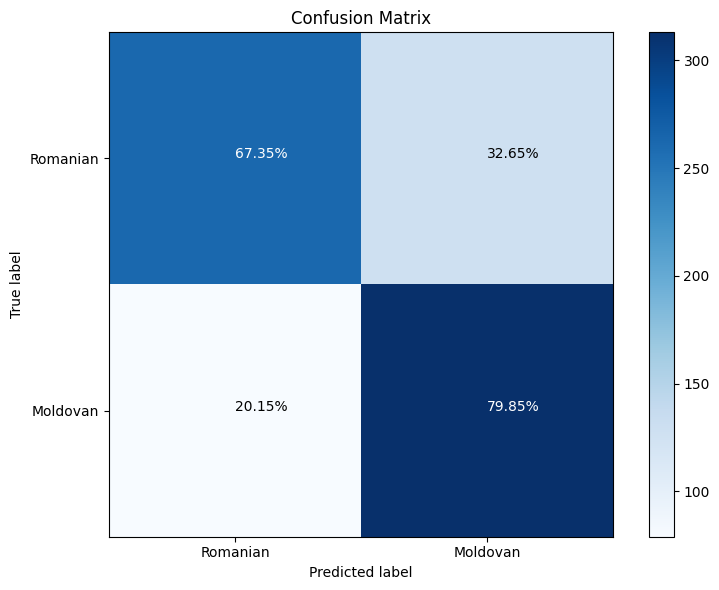

In [13]:
#train 80% test 20% of all data, regardless of category
texts = pd.concat([ro_df['text'], md_df['text']], ignore_index=True)
ro_labels = np.zeros(len(ro_df))
md_labels = np.ones(len(md_df))
labels = np.concatenate((ro_labels, md_labels))

vectorizer = TfidfVectorizer(vocabulary=stopwords)
X = vectorizer.fit_transform(texts)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=10)
test_samples = X_test.shape[0]

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
categories = ['Romanian', 'Moldovan']
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(categories))
plt.xticks(tick_marks, categories)
plt.yticks(tick_marks, categories)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, f'{cm_percentage[i, j]:.2f}%',
                color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


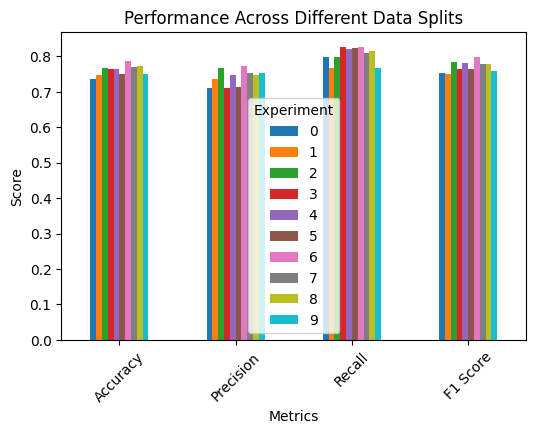

F1 scores:
[0.7524038461538461, 0.7503168567807351, 0.7824019024970273, 0.7649301143583227, 0.781582054309327, 0.764423076923077, 0.7980535279805353, 0.778998778998779, 0.7787391841779975, 0.7589616810877627]


In [14]:
#performance across different data splits
metrics_dict = {
    'Experiment': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for experimentIdx in range(0,10):
    texts = pd.concat([ro_df['text'], md_df['text']], ignore_index=True)

    ro_labels = np.zeros(len(ro_df))
    md_labels = np.ones(len(md_df))
    labels = np.concatenate((ro_labels,md_labels))


    vectorizer = TfidfVectorizer(vocabulary=stopwords)
    X = vectorizer.fit_transform(texts)
    
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=10+experimentIdx)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metrics_dict['Experiment'].append(experimentIdx)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1 Score'].append(f1)

metrics_df = pd.DataFrame(metrics_dict)

metrics_df = metrics_df.set_index('Experiment').T

metrics_df.plot(kind='bar', figsize=(6, 4))
plt.title('Performance Across Different Data Splits')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.show()

print("F1 scores:")
print(metrics_dict['F1 Score'])

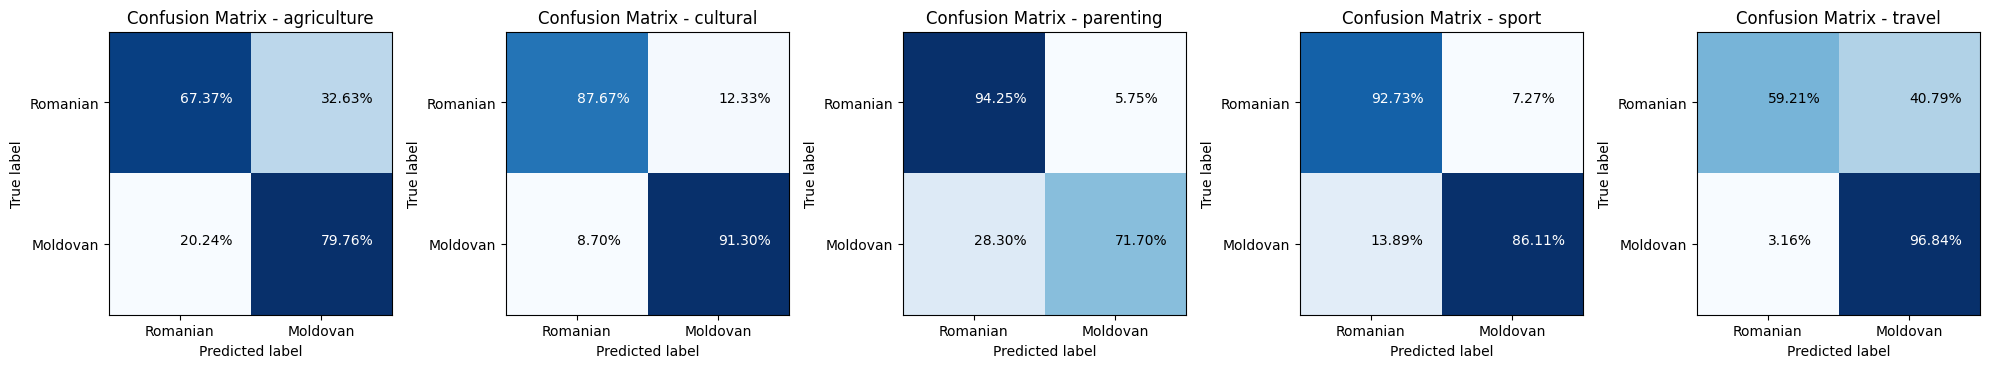

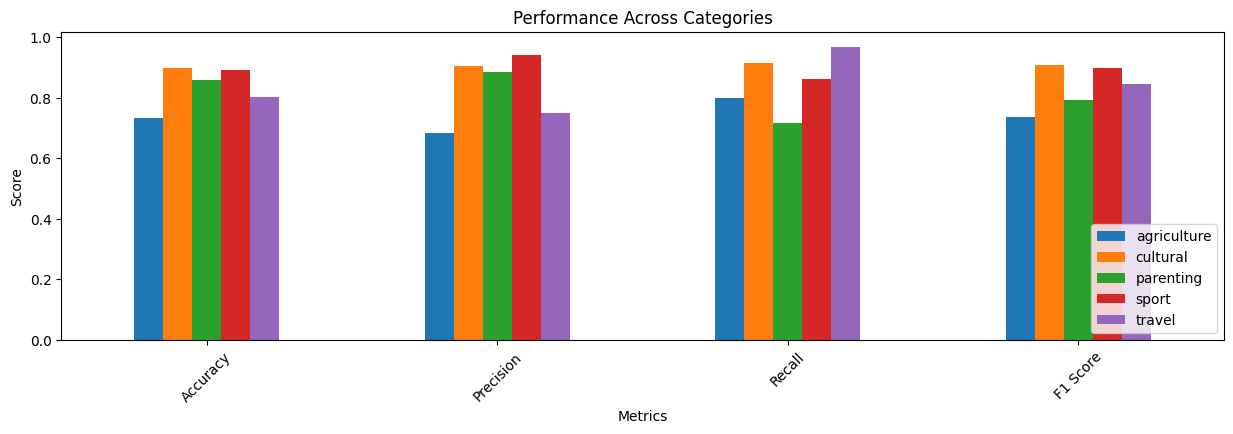

F1 scores:
[0.7362637362637362, 0.9081081081081082, 0.7916666666666666, 0.8985507246376813, 0.8440366972477064]


In [15]:
# antrenez pe o categorie si testez pe aceiasi categorie
nr_of_categories = 5

metrics_dict = {
    'Category': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6)) 

for idx, (category, catIdx) in enumerate(categoryIndex.items()):
    c = idx  
    
    ro_category = ro_df[ro_df['category'] == catIdx]
    md_category = md_df[md_df['category'] == catIdx]

    texts = pd.concat([ro_category['text'], md_category['text']], ignore_index=True)
    
    ro_labels = np.zeros(len(ro_category))
    md_labels = np.ones(len(md_category))
    labels = np.concatenate((ro_labels, md_labels))

    vectorizer = TfidfVectorizer(vocabulary=stopwords)
    X = vectorizer.fit_transform(texts)
    
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=10)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    im = axes[c].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    axes[c].set_title(f'Confusion Matrix - {category}')
    tick_marks = np.arange(2) 
    axes[c].set_xticks(tick_marks)
    axes[c].set_yticks(tick_marks)
    axes[c].set_xticklabels(['Romanian', 'Moldovan'])
    axes[c].set_yticklabels(['Romanian', 'Moldovan'])
    
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            axes[c].text(j, i, f'{cm_percentage[i, j]:.2f}%',
                         color="white" if cm[i, j] > thresh else "black")
    

            
    axes[c].set_ylabel('True label')
    axes[c].set_xlabel('Predicted label')
    
    metrics_dict['Category'].append(category)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1 Score'].append(f1)

plt.tight_layout()
plt.show()

metrics_df = pd.DataFrame(metrics_dict)
metrics_df = metrics_df.set_index('Category').T

metrics_df.plot(kind='bar', figsize=(15, 4))
plt.title('Performance Across Categories')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.legend(loc='lower right')

plt.show()

print("F1 scores:")
print(metrics_dict['F1 Score'])


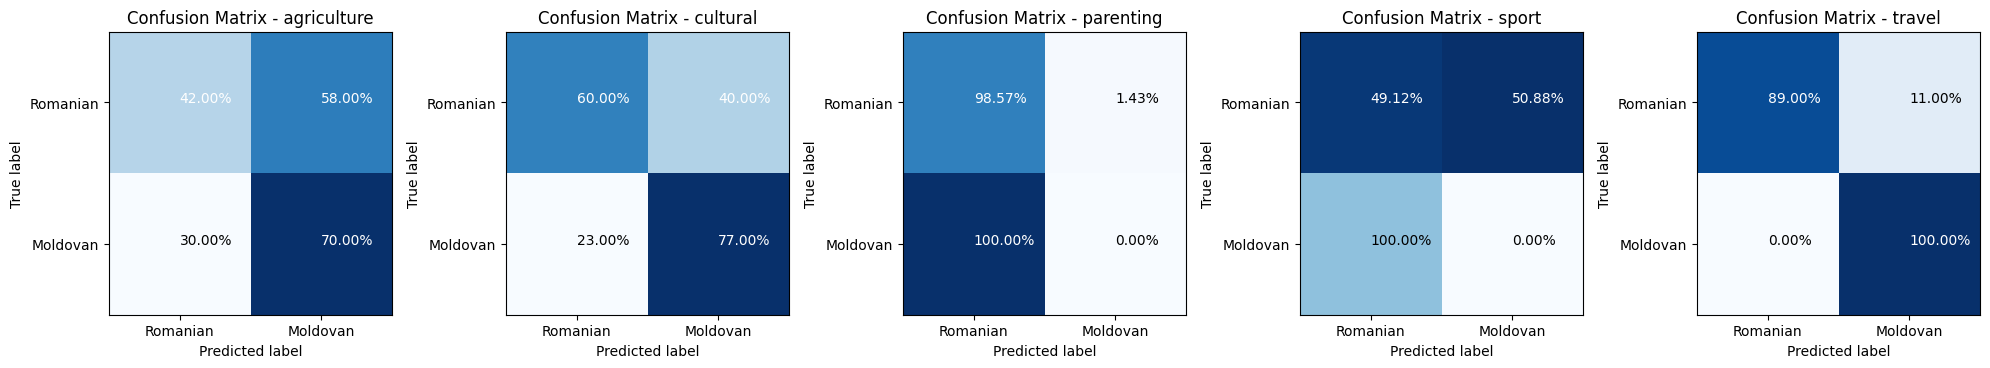

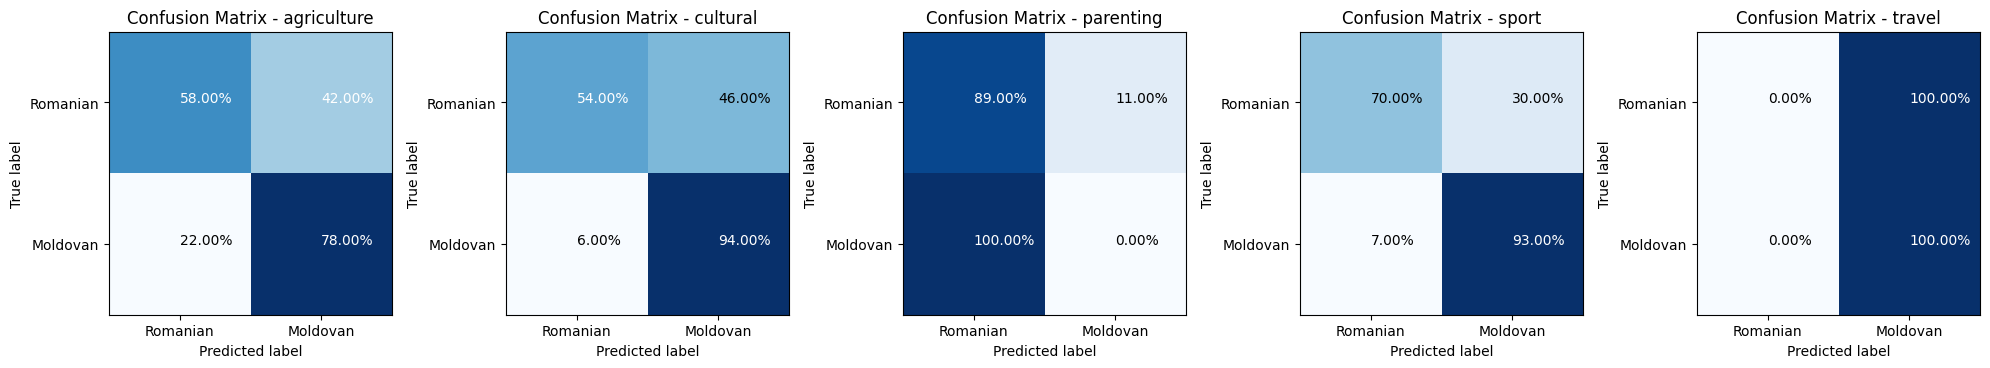

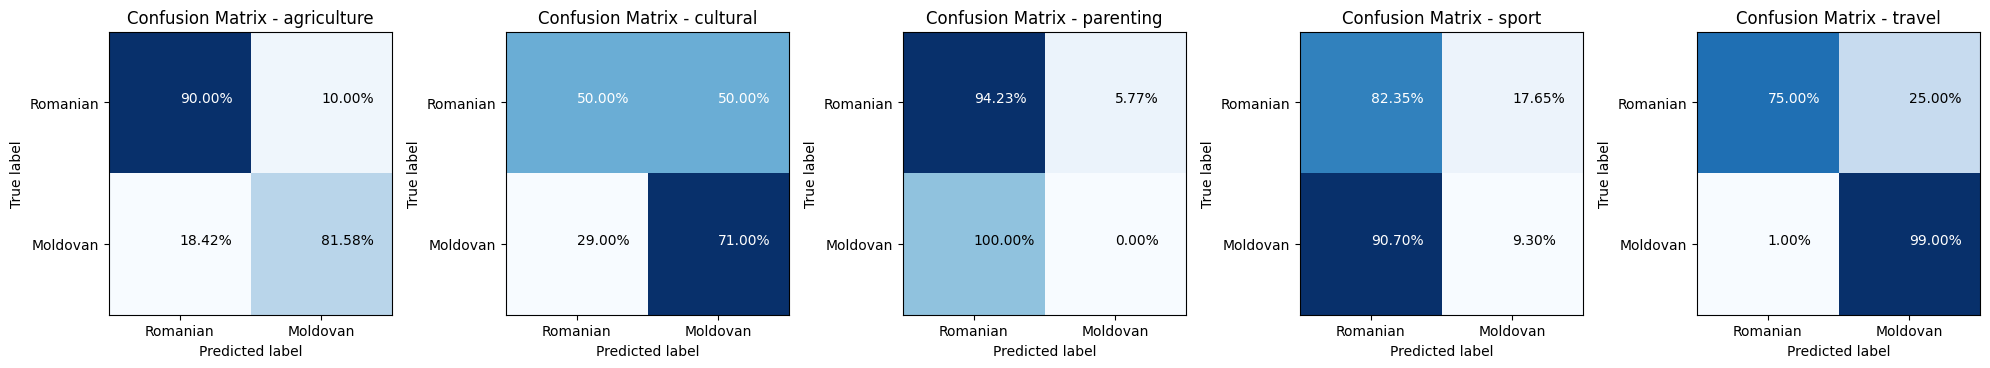

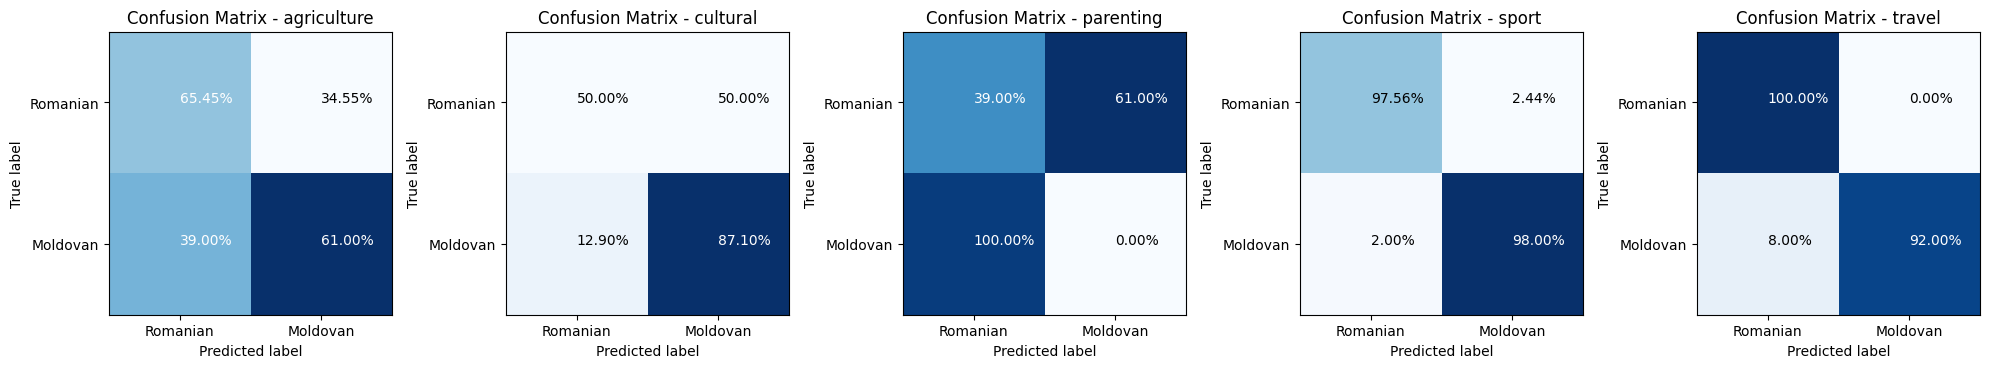

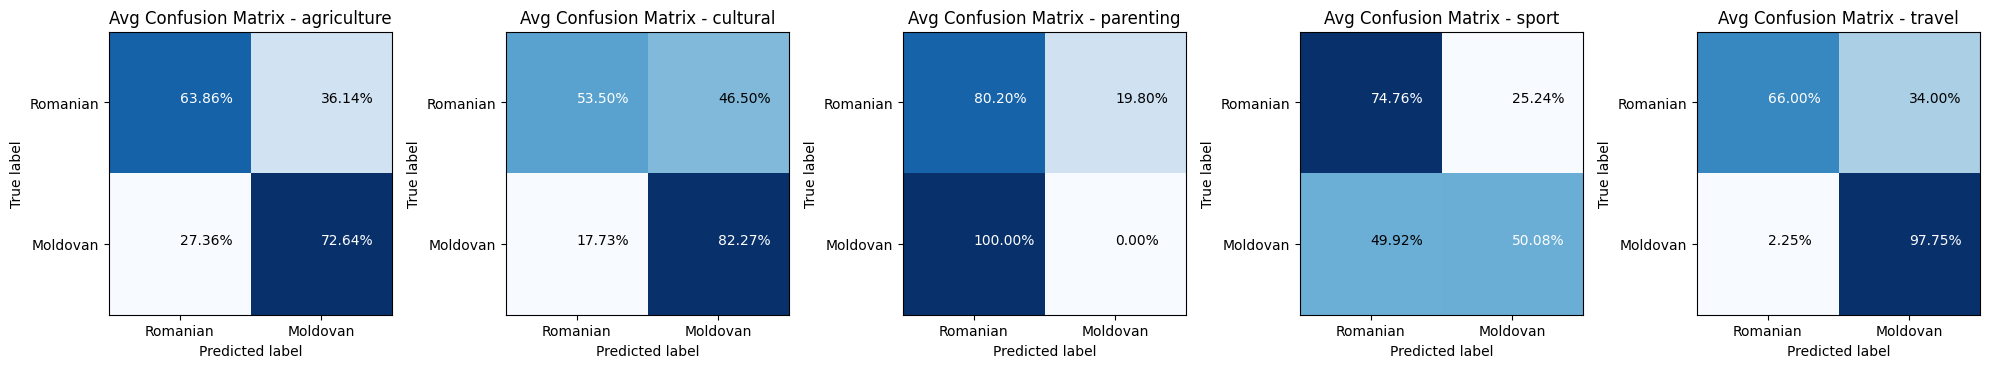

In [16]:
#antrenez pe 4 siteuri ale aceleiasi categorii si testez pe al 5 lea site
category_conf_matrices = {cat: np.zeros((2, 2)) for cat in categoryIndex.keys()}

for testedSiteIdx in range(1, 5):  
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6)) 

    for idx, (category, catIdx) in enumerate(categoryIndex.items()):
        c = idx  
        
        ro_train = ro_df[(ro_df['category'] == catIdx) & (ro_df['siteIdx'] != testedSiteIdx)]
        md_train = md_df[(md_df['category'] == catIdx) & (md_df['siteIdx'] != testedSiteIdx)]

        train_texts = pd.concat([ro_train['text'], md_train['text']], ignore_index=True)
        vectorizer = TfidfVectorizer(vocabulary=stopwords)
        X_train = vectorizer.fit_transform(train_texts)

        ro_labels_train = np.zeros(len(ro_train))
        md_labels_train = np.ones(len(md_train))
        y_train = np.concatenate((ro_labels_train, md_labels_train))

        ro_test = ro_df[(ro_df['category'] == catIdx) & (ro_df['siteIdx'] == testedSiteIdx)]
        md_test = md_df[(md_df['category'] == catIdx) & (md_df['siteIdx'] == testedSiteIdx)]

        test_texts = pd.concat([ro_test['text'], md_test['text']], ignore_index=True)
        X_test = vectorizer.transform(test_texts)

        ro_labels_test = np.zeros(len(ro_test))
        md_labels_test = np.ones(len(md_test))
        y_test = np.concatenate((ro_labels_test, md_labels_test))
            
        model = LogisticRegression()
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        cm = confusion_matrix(y_test, y_pred)
        cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

        category_conf_matrices[category] += cm_percentage

        im = axes[c].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        axes[c].set_title(f'Confusion Matrix - {category}')
        tick_marks = np.arange(2) 
        axes[c].set_xticks(tick_marks)
        axes[c].set_yticks(tick_marks)
        axes[c].set_xticklabels(['Romanian', 'Moldovan'])
        axes[c].set_yticklabels(['Romanian', 'Moldovan'])
        
        thresh = cm.max() / 2.
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                axes[c].text(j, i, f'{cm_percentage[i, j]:.2f}%',
                            color="white" if cm[i, j] > thresh else "black")
        
        axes[c].set_ylabel('True label')
        axes[c].set_xlabel('Predicted label')

    plt.tight_layout()
    plt.show()

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))
for idx, (category, catIdx) in enumerate(categoryIndex.items()):
    c = idx
    cm_avg = category_conf_matrices[category] / 4
    im = axes[c].imshow(cm_avg, interpolation='nearest', cmap=plt.cm.Blues)
    axes[c].set_title(f'Avg Confusion Matrix - {category}')
    tick_marks = np.arange(2)
    axes[c].set_xticks(tick_marks)
    axes[c].set_yticks(tick_marks)
    axes[c].set_xticklabels(['Romanian', 'Moldovan'])
    axes[c].set_yticklabels(['Romanian', 'Moldovan'])

    for i in range(cm_avg.shape[0]):
        for j in range(cm_avg.shape[1]):
            axes[c].text(j, i, f'{cm_avg[i, j]:.2f}%',
                        color="white" if cm_avg[i, j] > thresh else "black")

    axes[c].set_ylabel('True label')
    axes[c].set_xlabel('Predicted label')

plt.tight_layout()
plt.show()


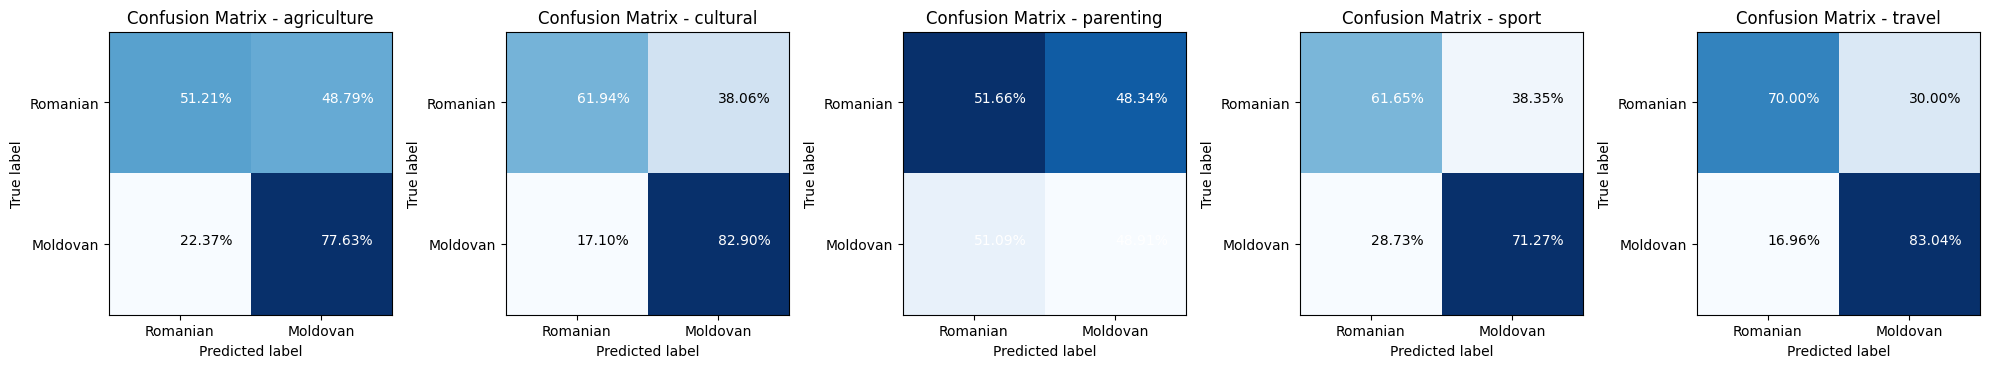

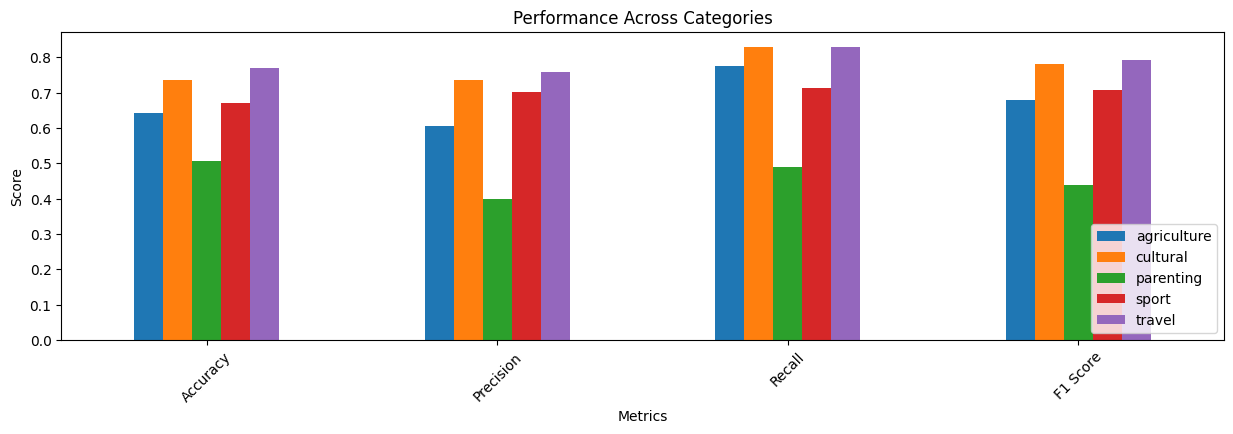

F1 scores:
[0.68, 0.780040733197556, 0.43902439024390244, 0.7076923076923076, 0.7928496319663513]


In [17]:
# antrenez pe 4 categorii si testez pe a 5 a
nr_of_categories = 5

metrics_dict = {
    'Category': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6)) 

for idx, (category, catIdx) in enumerate(categoryIndex.items()):
    c = idx  
    
    ro_train = ro_df[ro_df['category'] != catIdx]
    md_train = md_df[md_df['category'] != catIdx]

    train_texts = pd.concat([ro_train['text'], md_train['text']], ignore_index=True)
    vectorizer = TfidfVectorizer(vocabulary=stopwords)
    X_train = vectorizer.fit_transform(train_texts)

    ro_labels = np.zeros(len(ro_train))
    md_labels = np.ones(len(md_train))
    y_train = np.concatenate((ro_labels, md_labels))

    ro_test = ro_df[ro_df['category'] == catIdx]
    md_test = md_df[md_df['category'] == catIdx]

    test_texts = pd.concat([ro_test['text'], md_test['text']], ignore_index=True)
    vectorizer = TfidfVectorizer(vocabulary=stopwords)
    X_test = vectorizer.fit_transform(test_texts)

    ro_labels = np.zeros(len(ro_test))
    md_labels = np.ones(len(md_test))
    y_test = np.concatenate((ro_labels, md_labels))
        
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    im = axes[c].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    axes[c].set_title(f'Confusion Matrix - {category}')
    tick_marks = np.arange(2) 
    axes[c].set_xticks(tick_marks)
    axes[c].set_yticks(tick_marks)
    axes[c].set_xticklabels(['Romanian', 'Moldovan'])
    axes[c].set_yticklabels(['Romanian', 'Moldovan'])
    
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            axes[c].text(j, i, f'{cm_percentage[i, j]:.2f}%',
                         color="white" if cm[i, j] > thresh else "black")
    
    axes[c].set_ylabel('True label')
    axes[c].set_xlabel('Predicted label')
    
    metrics_dict['Category'].append(category)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1 Score'].append(f1)

plt.tight_layout()
plt.show()

metrics_df = pd.DataFrame(metrics_dict)
metrics_df = metrics_df.set_index('Category').T

metrics_df.plot(kind='bar', figsize=(15, 4))
plt.title('Performance Across Categories')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.legend(loc='lower right')

plt.show()

print("F1 scores:")
print(metrics_dict['F1 Score'])
